# Core Values: A Geological Quest

Welcome to the Core Values: <i>A Geological Quest</i>! challenge 🌍✨

Get ready to embark on an exciting journey into the depths of Earth's history. This challenge is all about sedimentary facies segmentation, using high-resolution photos of sedimentary core samples. Imagine yourself as a geological detective, uncovering the hidden secrets within these core photos. We need your expertise to build a cutting-edge computer vision model that can segment sedimentary facies with incredible precision and speed.

Your mission? To develop a system that can accurately identify and categorize these facies, transforming how geologists analyze the intricate layers of the Earth's crust. By doing so, you'll not only be solving a fascinating problem but also contributing to a deeper understanding of our planet's geological history.

And there's more! As you build a robust core segmentation model, you'll be unlocking treasures of knowledge that will aid geologists in their quest to unravel Earth's secrets. Your work will play a crucial role in advancing geological research and could lead to groundbreaking discoveries.

So, are you ready to take on the challenge and make your mark in the world of geology? Let's dive in and start uncovering the core values of our planet! 🏞️🔍




### Supplied Materials:
 
*  Starter Notebook
*  Train dataset: consisting of 2079 unlabeled samples and 340 labeled samples, all in `.png` format. For the labeled data, you have 340 `<sample_id>_img.png` files, each paired with a corresponding `<sample_id>_lab.png` label file, which represents the segmentation.
*  Test dataset: 70 `.png` files for which you will submit your segmentation results for your predictive leaderboard score.
*  `utils.py`: containing some functions used in this starter notebook and to help you get started.
*  `requirements.txt`: this file should contain all the required packages for your submission.

# Imports
REMEMBER TO ADD YOUR PACKAGES TO the requirements.txt

In [1]:
import numpy as np
import random
from typing import Literal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageDraw
from glob import glob
from anytree import Node, RenderTree
import os
import re
import copy
import shutil
from tqdm import tqdm
from collections import Counter
import json


from utils import *

# Data

You can download the train (labeled and unlabeled) and test data from the challenge’s webpage or portal under the data tab.

Let's assume that you have downloaded the train and test data, and organized them as shown in the tree below.


In [2]:
sketch_directory_tree()

current_directory
├── starter_notebook.ipynb
├── utils.py
└── data
    ├── train
    ├── train_unlabeled
    └── test


Below, we use the `plot_raw_label()` function to display the raw core and segmented images for a sample ID from the training dataset. In this sample, there are three classes of sedimentary facies: Brown, Blue, and White (background). Overall, there are nine classes (colors) across the training, testing, and private holdout datasets. Additionally, we provide a plot of all class numbers with their corresponding RGB colors.

<b>Important Note:</b> Throughout this challenge, ensure you use the same 1-to-1 mapping between class numbers and RGB colors as provided in the `class_dict`.

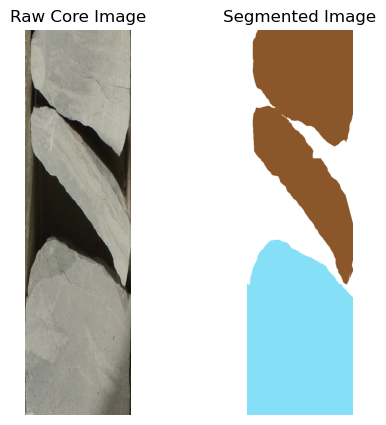

In [3]:
plot_raw_label(directory_path="./data/train", sample_id="1")

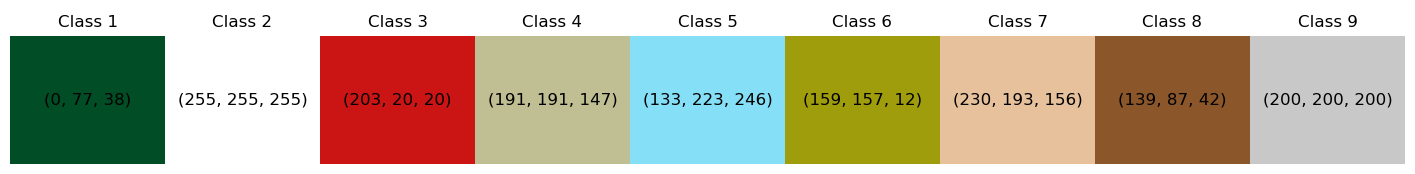

In [4]:
class_dict = {
    1: (0, 77, 38),
    2: (255, 255, 255),
    3: (203, 20, 20),
    4: (191, 191, 147),
    5: (133, 223, 246),
    6: (159, 157, 12),
    7: (230, 193, 156),
    8: (139, 87, 42),
    9: (200, 200, 200),
}
plot_class_RGBcolors(class_dict)

### Creating label masks

To assist with visualization and model training, we have provided two functions: `create_label()` and `plot_image_with_mask()`. The `create_label()` function generates a label mask for a given image label, while the `plot_image_with_mask()` function overlays an image with mask labels (class numbers) for enhanced visualization.

Below, we apply both functions to create a mask label for a training sample and overlay it with the sample's segmented image.

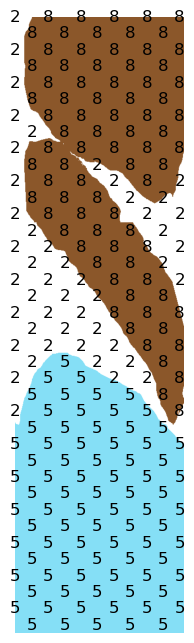

In [5]:
image_path_lab = "./data/train/1_lab.png"
mask_gt = create_label_mask(image_path_lab, class_dict)
plot_image_with_mask(image_path_lab, mask_gt)

# Your Solution
Your task is summarized below.

**Objective**: Develop a model to process a raw core image and classify the different facies present.

**Input**: A `.png` file representing a core image.

**Output**: A mask label array, which is a 2D array of the same height and width dimensions as the input image, containing class numbers (as numpy.unit8) of the different facies in the input image.

## Innovative Approaches:

We encourage participants to explore innovative approaches in their submissions. In particular, leveraging <b>transformer models</b> or <b>foundation models</b> can significantly enhance the performance of your solutions. These models have shown remarkable success in various domains and could be highly effective for this challenge.

Additionally, we have provided a <b>substantial amount of unlabeled training data</b> (2079 sedimentary core images) alongside the labeled training data (340 segmented core images). Utilizing this unlabeled data effectively can lead to more robust and accurate models. Techniques such as semi-supervised learning, self-supervised learning, or data augmentation can help you make the most of this valuable resource.

To further incentivize creativity and innovation, we have dedicated an <b>honorable mention</b> with <b>prize money</b> for the <b>best and most innovative use of unlabeled data</b>. We look forward to seeing how you can incorporate these advanced techniques and datasets into your pipelines to achieve outstanding results.


# Submission File Format

To calculate your predictive leaderboard score, your submission file should be an `.npz` file containing 70 arrays. Each array's name should be a string in the format `<sample_id>_lab`, where `<sample_id>` corresponds to the sample IDs in the test dataset, ranging from 1 to 70. For example, for the test file `55_img.png` with dimensions (287 × 1267), your `.npz` submission file should include an item named `55_lab` with a label mask array of size (287 × 1267) as its value. Ensure that the data type for all predicted mask arrays is `numpy.uint8`. Your `.npz` submission file must contain exactly 70 items, representing predictions for all 70 test images.

To assist you further, we have provided a `sample_submission.npz` file and a function, `create_sample_submission()`, that generates a dummy sample submission file. You can run the cell below to create a dummy sample submission. The provided function saves the generated sample submission as a `.npz` file and returns a corresponding dictionary.

In [ ]:
directory_path = "./data/test"
sample_submission_path = "./sample_submission.npz"
sample_submission_dict = create_sample_submission(
    directory_path, sample_submission_path
)

# Evaluation Metric: Image-wise Macro-Averaged Dice Score

The Image-wise Macro-Averaged Dice score is used to evaluate the performance of the multi-class segmentation task in this challenge. This metric measures the similarity between the predicted segmentation masks and the ground truth masks for each class, averaged across all images in the test dataset.

## Calculation:
1. <b>Dice Score for Each Class:</b> For each image, the Dice score is calculated for each class. The Dice score for a single class is given by:

$$ \text{Dice}(A, B) = \frac{2 \times |A \cap B|}{|A| + |B|} $$ 
where (A) is the set of pixels in the predicted mask for the class, and (B) is the set of pixels in the ground truth mask for the same class.

2. <b>Macro-Averaging:</b> For each image, the Dice scores for all classes in that image are calculated and then are averaged to get the image-wise Dice score for that image. This ensures that each class contributes equally to the final score, regardless of its frequency. This process is repeated for each image in the dataset to obtain a single image-wise Dice score for each image.

3. <b>Image-wise Averaging:</b> Finally, the image-wise Dice scores are averaged across all images in the test dataset to obtain the Image-wise Macro-Averaged Dice score.

This metric provides a balanced evaluation by considering the performance across all classes and images, making it suitable for multi-class segmentation tasks.

To help you better understand how the Dice score is calculated, we have provided two functions in the `utils.py` module:

1. `calculate_dice()`: This function takes the ground truth and predicted masks for a single image and calculates the image-wise Dice score for that image.
2. `calculate_score()`: This function takes the answer key and submission `.npz` files, calculates the image-wise Dice scores for all samples, and then averages them to produce the final image-wise macro-averaged Dice score.


Before using the two functions mentioned above, we need to have both an answer key (ground truth) and a submission (predicted) `.npz` file. We can use the `create_sample_submission()` function twice to generate two dummy sample submissions, using one as the answer key and the other as the submission. However, in this case, we will create an actual answer key for the labeled training data.

To do this, we have provided a function called `create_sample_answerkey_pred()` in the `utils.py` module. This function creates and saves an answer key as well as a dummy sample submission for a specified number of samples in the training set. Below, we demonstrate this process for `n=10` samples.

In [6]:
directory_path = "./data/train"
sample_gt_submission = "./sample_gt_submission.npz"
sample_pred_submission = "./sample_pred_submission.npz"
n = 10
create_sample_answerkey_pred(
    directory_path, n, class_dict, sample_gt_submission, sample_pred_submission
)

Processing images: 100%|████████████████████████| 10/10 [00:04<00:00,  2.46it/s]


With a sample answer key and a sample submission file prepared, we can now use the calculate_score() function to compute the Dice score for this sample submission file.

In [10]:
answerkey_file = "./sample_gt_submission.npz"
submission_file = "./sample_pred_submission.npz"
calculate_score(answerkey_file, submission_file)

0.1516238960603851

Naturally, if we replace the sample submission file with the sample answer key, the Dice score will be equal to 1, as demonstrated below.

In [11]:
calculate_score(answerkey_file, answerkey_file)

1.0

# Importance of Inference Speed

In addition to achieving high predictive accuracy, the speed of your model's inference is crucial for this challenge. While the primary evaluation metric for the Predictive Leaderboard is the Dice score, we have set a strict requirement for the final evaluation phase: your trained model <b>must</b> complete inference on 81 unseen images within <b>30 minutes</b> on an <i>AWS SageMaker g5.12xlarge</i> instance. Submissions that fail to meet this time constraint will be disqualified.

To emphasize the importance of inference speed, we will also award <b>two honorable mentions</b> with <b>prize money</b> for the <b>fastest inference times on GPU and CPU</b>. This means that optimizing your model for speed, in addition to accuracy, can significantly enhance your chances of winning.

For the Final Evaluation, the top submissions on the Predictive Leaderboard will be invited to submit their fully reproducible Python code. A panel of judges will review the code and run the submitted algorithms on the specified hardware. Ensuring your model runs efficiently within the given time frame is essential for success in this competition.

# Submission Requirements and Guidelines for Smooth Evaluation

To ensure that your submission can be evaluated smoothly and efficiently, please follow these guidelines. Adhering to these best practices will help us run your code without issues and will also reflect positively on your submission. Failure to comply with these best practices may result in disqualification or delays in the evaluation of your submission.

#### 1. Documentation
- **README Files**: Include a README.md file that provides an overview of your project, instructions on how to run your code, and any other relevant information.
- **Docstrings**: Ensure that all functions and classes have clear and concise docstrings explaining their purpose and usage.
- **Markdown Cells**: Use markdown cells in your Jupyter Notebook to explain the steps of your workflow, the rationale behind your choices, and any important details.

#### 2. Environment Management
- **Document the Environment**: Clearly document the computing environment, including the operating system, Python version, and any other relevant details.
- **Dependencies**: Provide a detailed list of all required libraries and their versions in a `requirements.txt` file.
- **Reproducibility**: Before submission, create a clean environment using your `requirements.txt` file and ensure that your code runs without errors in this environment.

#### 3. Folder Organization and Code Modularity
- **Folder Structure**: Organize your project files logically. Separate scripts, data, models, and documentation into distinct folders.
- **Modular Code**: Write modular code by separating different stages of your workflow (e.g., data loading, preprocessing, training, inference) into distinct functions or modules.
- **Avoid Hard-Coding Paths**: Avoid hard-coding paths, especially data paths. Use variables for data path or configuration files to specify paths, ensuring that your code can run on different machines without modification.

#### 4. Workflow Orchestration
- **Main Script**: Use a main Jupyter Notebook to orchestrate the workflow. This Notebook should call the necessary functions or modules in the correct order and provide a clear overview of the entire process.

#### 5. Model Checkpoints
- **Save Checkpoints**: Save and include trained model checkpoints in your submission.
- **Instructions**: Provide clear instructions on how to save, load, and use the model checkpoints, preferably in your README.md file.

#### 6. Double-Check Files
- **Include Necessary Files**: Ensure that all necessary files are included in your submission. This includes the license, notebook, `requirements.txt`, model checkpoints, and any other essential files.
- **Exclude Unnecessary Files**: Exclude unnecessary files such as training and test data to keep your submission clean and focused, and smaller in size.


# Final Evaluation Criteria

If you are selected to send your code and files for the final evaluation, 90% of your final score will be based on your model's Dice score on the private holdout dataset. The remaining 10% will depend on how well you follow the above-mentioned guidelines. This means that thorough documentation, proper environment management, good folder organization, modular code, and the inclusion of all necessary files are crucial for your success.

To further emphasize the importance of these points, we have dedicated <b>one honorable mention</b> with <b>prize money</b> for the <b>best documentation</b>. This award will recognize the submission that excels in clarity, completeness, and usability of its documentation.

By strictly following these guidelines, you will help us evaluate your submission more effectively and increase the chances of your work being recognized. Non-compliance with these requirements may lead to your submission being rejected or not evaluated properly. <b>Thank you for your attention to details and good luck with the challenge!</b>